In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
day1 = '5fe3412c923d596335e69d4c-20210808-v0.0.1_SE05000139_Kaeltemaschine.csv' ## Sunday
day2 = '5fe3412c923d596335e69d4c-20210809-v0.0.1_SE05000139_Kaeltemaschine.csv' ## Monday
day3 = '5fe3412c923d596335e69d4c-20210810-v0.0.1_SE05000139_Kaeltemaschine.csv' ## Tuesday
day1 = pd.read_csv('/Users/wastechs/Documents/data/Kaeltemaschine/{}'.format(day1))
day2 = pd.read_csv('/Users/wastechs/Documents/data/Kaeltemaschine/{}'.format(day2))
day3 = pd.read_csv('/Users/wastechs/Documents/data/Kaeltemaschine/{}'.format(day3))

In [5]:
day1.head()

,t,L,V,I,S,P,Q,PF,PHI
0,1.628374e+09,1.0,238.921,31.026,7411.529,4752.550,5675.528,0.642,120.0
1,1.628374e+09,2.0,239.071,29.281,6998.035,4515.562,5331.538,0.647,120.0
2,1.628374e+09,3.0,240.536,30.406,7315.965,4822.356,5482.820,0.659,120.0
3,1.628374e+09,1.0,238.920,30.994,7403.923,4749.859,5656.511,0.642,120.0
4,1.628374e+09,2.0,239.067,29.265,6994.562,4522.702,5318.453,0.647,120.0


In [6]:
def epoch_convert(df):
    df.t = pd.to_datetime(df.t, unit='s')
    df.set_index(df.t, inplace=True)
    del df['t']
    return df

In [7]:
day1 = epoch_convert(day1)
day2 = epoch_convert(day2)
day3 = epoch_convert(day3)

In [8]:
day1.shape, day2.shape, day3.shape

((3101193, 8), (3101067, 8), (3101172, 8))

In [9]:
day1.index.min(), day1.index.max(), day2.index.min(), day2.index.max(), day3.index.min(), day3.index.max()

(Timestamp('2021-08-07 21:59:00.200999975'),
 Timestamp('2021-08-08 21:59:00.029000044'),
 Timestamp('2021-08-08 21:59:00.222000122'),
 Timestamp('2021-08-09 21:59:00.071000099'),
 Timestamp('2021-08-09 21:59:00.207999945'),
 Timestamp('2021-08-10 21:59:00'))

In [10]:
def decompose_phases(df):
    df_1 = df[df.L == 1.0]
    df_2 = df[df.L == 2.0]
    df_3 = df[df.L == 3.0]

    return df_1, df_2, df_3

In [11]:
day1_phase1, day1_phase2, day1_phase3 = decompose_phases(day1)
day2_phase1, day2_phase2, day2_phase3 = decompose_phases(day2)
day3_phase1, day3_phase2, day3_phase3 = decompose_phases(day3)

In [31]:
def load_plotter(df, feat, resample=None):
    
    if resample != None:
        plt.figure(figsize=(16, 6))
        plt.plot(df.resample(resample).sum().index, df[feat].resample(resample).sum())
        plt.title('Kaeltemaschine')
        plt.xlabel('Time = M-d-H')
        plt.ylabel('Power')
        plt.show()

    else:
        plt.figure(figsize=(16, 6))
        plt.plot(df.index, df[feat])
        plt.title('Kaeltemaschine')
        plt.xlabel('Time = M-d-H')
        plt.ylabel('Power')
        plt.show()

In [ ]:
load_plotter(day3_phase1, 'P', '30T')

In [ ]:
load_plotter(day3_phase1, 'P', '15T')

In [ ]:
load_plotter(day3_phase1, 'P', '10T')

In [ ]:
load_plotter(day3_phase1, 'P', '5T')

In [ ]:
load_plotter(day3_phase1, 'P', '1T')

For Tuesday, idle / standby mode seems to be occuring from 21:00 until about 7:00. Then normal operations from 7:00 until 19:00 and standby mode again until 7:00. Three peaks occuring around mid-day and in the afteroon are worth investigating more

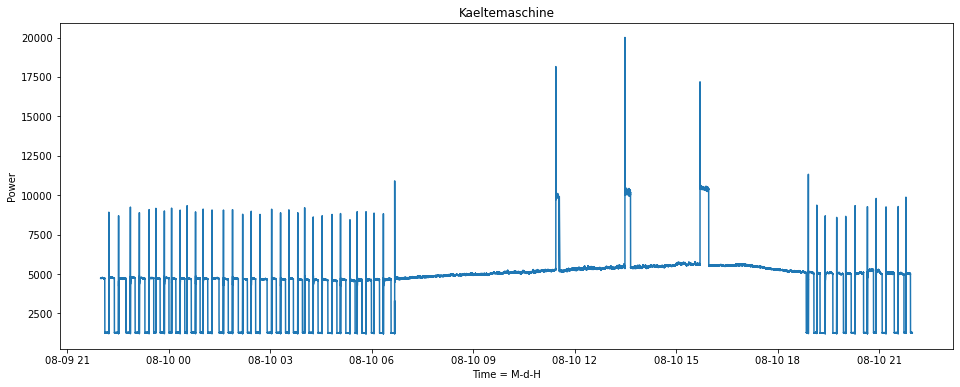

In [32]:
load_plotter(day3_phase1, 'P')

For Monday, idle / standby mode seems to be occuring from 21:00 until about 8:00. Then normal operations from 8:00 until 19:00 and standby mode again until 7:00. The difference with this load profile is there are no peaks occuring. Rather a steady state "normal" operation mode throughout the business hours

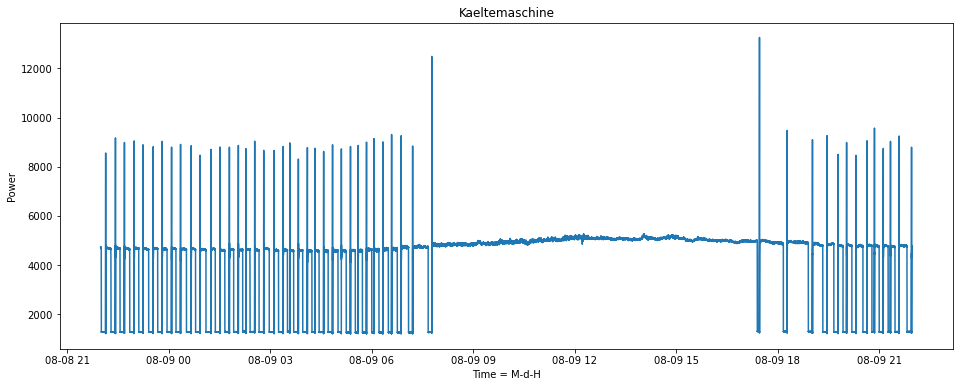

In [25]:
load_plotter(day2_phase1, 'P')

For Sunday, idle / standby mode seems to be occuring for the majority of the day

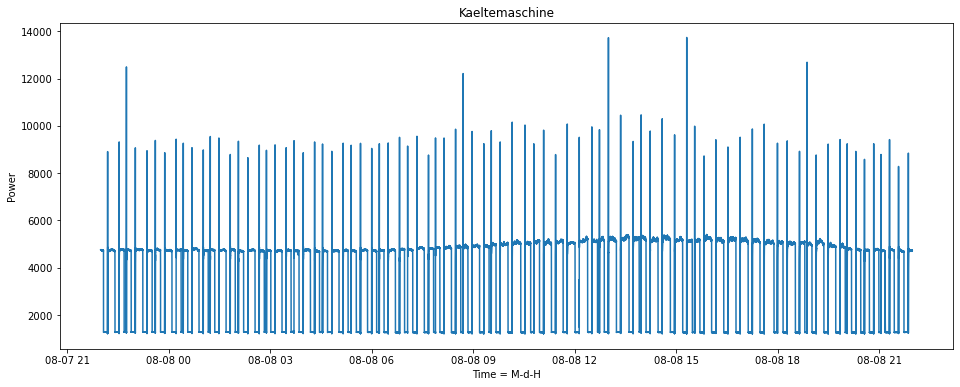

In [28]:
load_plotter(day1_phase1, 'P')